In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'C:/Users/sivas/stats/credit_risk_dataset.csv'

df = pd.read_csv(path)

In [3]:
df.shape

(32581, 12)

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
#convering dtype of column -> loan_status from numerical to categorical
dic = {0:"NO", 1:"YES"}
df["loan_status"] = df["loan_status"].map(dic)

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,YES,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,NO,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,YES,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,YES,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,YES,0.55,Y,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  object 
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 3.0+ MB


# Identifying and Treating missing values

In [9]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
#PEL -> person_emp_length
PEL_min = df["person_emp_length"].min()
PEL_max = df["person_emp_length"].max()
PEL_mean = df["person_emp_length"].mean()
PEL_med = df["person_emp_length"].median()
PEL_mod = df["person_emp_length"].mode()
PEL_std = df["person_emp_length"].std()

In [11]:
print(PEL_min)
print(PEL_max)
print(PEL_mean)
print(PEL_med)
print(PEL_mod)
print(PEL_std)

0.0
123.0
4.789686296787225
4.0
0    0.0
Name: person_emp_length, dtype: float64
4.142630148887972


<AxesSubplot:ylabel='Density'>

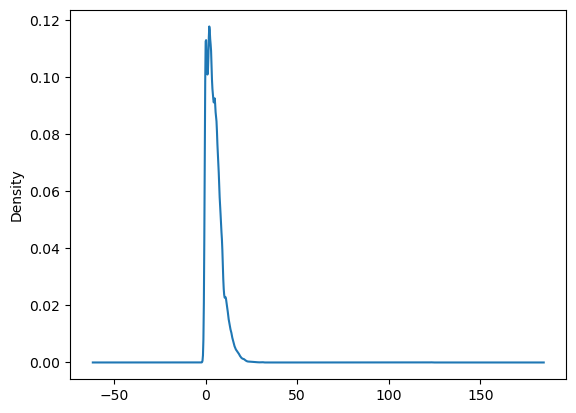

In [12]:
#Dist plot of column -> person_emp_length
df['person_emp_length'].plot(kind = 'kde')

In [13]:
# treating missing values in column -> person_emp_length
df["person_emp_length"].fillna(PEL_med, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  object 
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 3.0+ MB


In [14]:
#LIR -> loan_int_rate
LIR_min = df["loan_int_rate"].min()
LIR_max = df["loan_int_rate"].max()
LIR_mean = df["loan_int_rate"].mean()
LIR_med = df["loan_int_rate"].median()
LIR_mod = df["loan_int_rate"].mode()
LIR_std = df["loan_int_rate"].std()

In [15]:
print(LIR_min)
print(LIR_max)
print(LIR_mean)
print(LIR_med)
print(LIR_mod)
print(LIR_std)

5.42
23.22
11.01169489224439
10.99
0    7.51
Name: loan_int_rate, dtype: float64
3.2404594649559195


<AxesSubplot:ylabel='Density'>

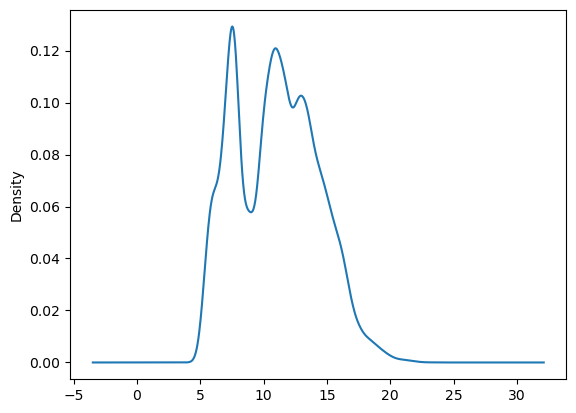

In [16]:
#Dist plot of column -> loan_int_rate
df['loan_int_rate'].plot(kind = 'kde')

In [56]:
df["loan_int_rate"].fillna(int(LIR_mean), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32333 entries, 1 to 32579
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32333 non-null  int64  
 1   person_income               32333 non-null  int64  
 2   person_home_ownership       32333 non-null  object 
 3   person_emp_length           32333 non-null  float64
 4   loan_intent                 32333 non-null  object 
 5   loan_grade                  32333 non-null  object 
 6   loan_amnt                   32333 non-null  int64  
 7   loan_int_rate               32333 non-null  float64
 8   loan_status                 32333 non-null  object 
 9   loan_percent_income         32333 non-null  float64
 10  cb_person_default_on_file   32333 non-null  object 
 11  cb_person_cred_hist_length  32333 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 3.2+ MB


# Univariate Analysis on columns

In [18]:
columns = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']

In [19]:
def uni_viz(column):
    if df[column].dtype ==  object:
        print(f"Mode of the column {column}:", df[column].mode())
        df[column].value_counts().plot(kind = 'barh')
    else :
        print("Minimum of Column" ,column," :",df[column].min())
        print("Maximum of Column" ,column," :",df[column].max())
        print("Mean of Column" ,column," :",df[column].mean())
        print("Median of Column" ,column," :",df[column].median())
        print("Std of Column" ,column," :",df[column].std())
        df[column].plot(kind = 'box')
        plt.show()
        df[column].plot(kind = 'kde')
        plt.show()
        stats.probplot(df[column],dist='norm',plot=plt)
        plt.show()

Minimum of Column person_age  : 20
Maximum of Column person_age  : 144
Mean of Column person_age  : 27.73459992019889
Median of Column person_age  : 26.0
Std of Column person_age  : 6.3480784192252475


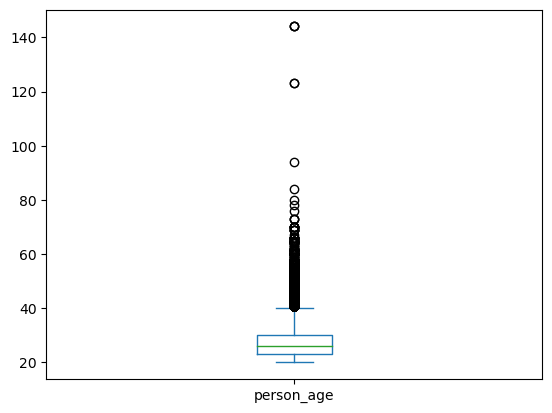

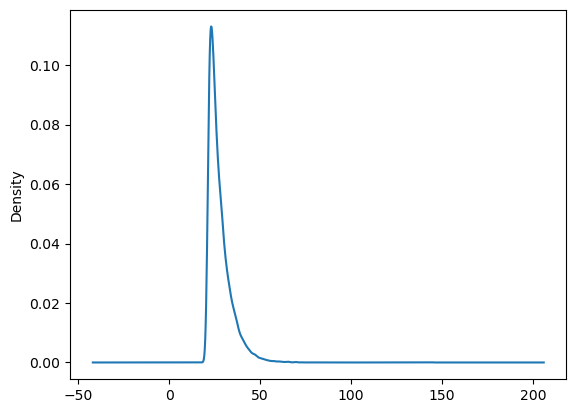

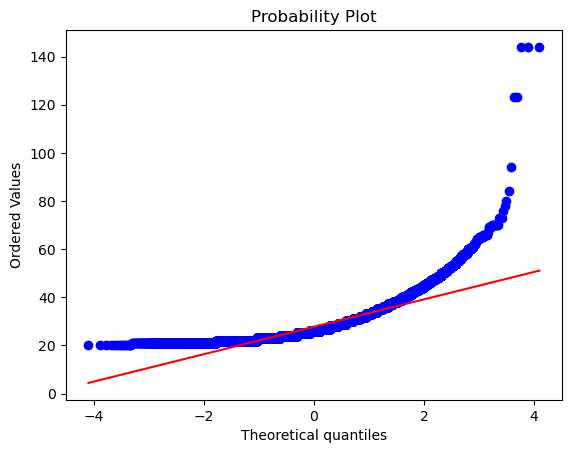

In [20]:
# Univariate Analysis on column -> person_age
uni_viz("person_age")

In [21]:
# Treating outliers
df = df[(df['person_age'] < 100)]

age_q1 = df['person_age'].quantile(0.10)
age_q3 = df['person_age'].quantile(0.90)

age_IQR = age_q3 - age_q1

age_lower_bound = age_q1 - 1.5 * age_IQR
age_upper_bound = age_q3 + 1.5 * age_IQR

print(age_lower_bound)
print(age_upper_bound)

df = df[(df['person_age'] > age_lower_bound) & (df['person_age'] < age_upper_bound)]
print(df.shape)

1.0
57.0
(32457, 12)


Minimum of Column person_age  : 20
Maximum of Column person_age  : 56
Mean of Column person_age  : 27.589087099855192
Median of Column person_age  : 26.0
Std of Column person_age  : 5.827301214604385


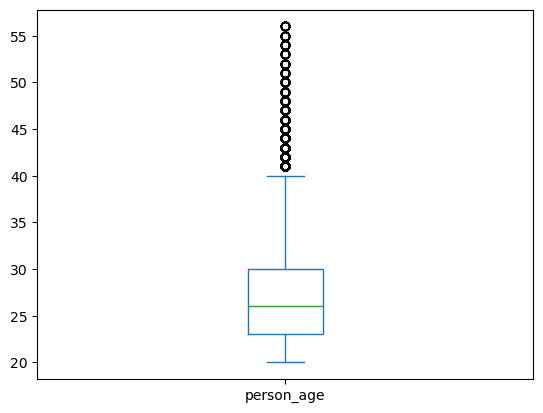

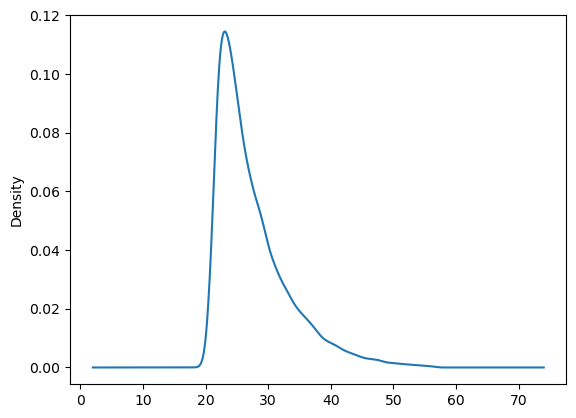

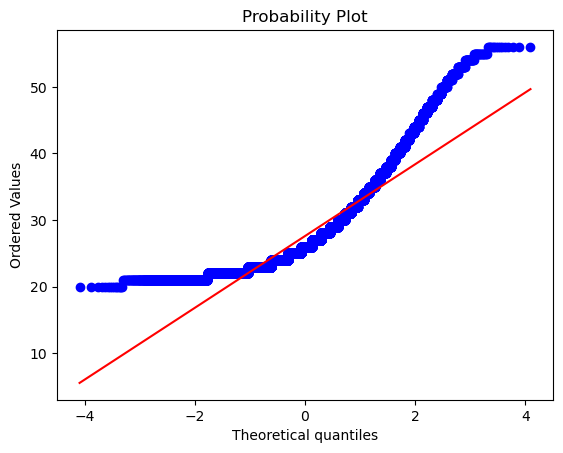

In [22]:
uni_viz('person_age')

Minimum of Column person_income  : 4000
Maximum of Column person_income  : 2039784
Mean of Column person_income  : 65696.29340358012
Median of Column person_income  : 55000.0
Std of Column person_income  : 50161.44043330464


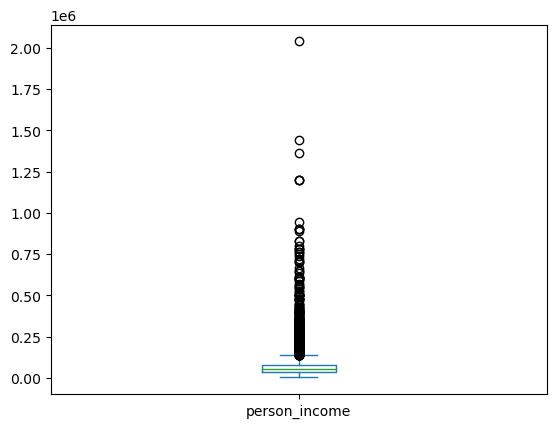

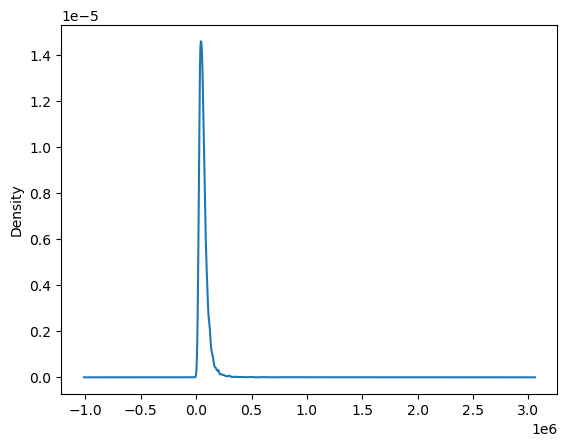

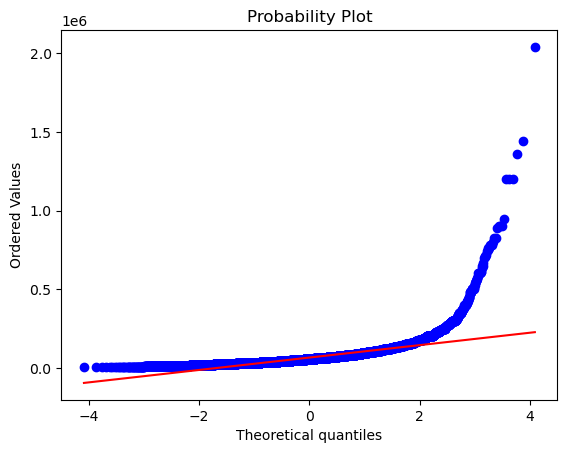

(32457, 12)


In [23]:
# Univariate Analysis on column -> person_income
uni_viz('person_income')
print(df.shape)

In [24]:
# outliers treatment
income_q1 = df['person_income'].quantile(0.10)
income_q3 = df['person_income'].quantile(0.95)

income_IQR = income_q3 - income_q1

income_lower_bound = income_q1 - 1.5 * income_IQR
income_upper_bound = income_q3 + 1.5 * income_IQR

print(income_lower_bound)
print(income_upper_bound)

df = df[(df['person_income'] > income_lower_bound) & (df['person_income'] < income_upper_bound)]
print(df.shape)

-149800.0
310680.0
(32335, 12)


Minimum of Column person_income  : 4000
Maximum of Column person_income  : 310400
Mean of Column person_income  : 63911.2086902737
Median of Column person_income  : 55000.0
Std of Column person_income  : 37654.82701674297


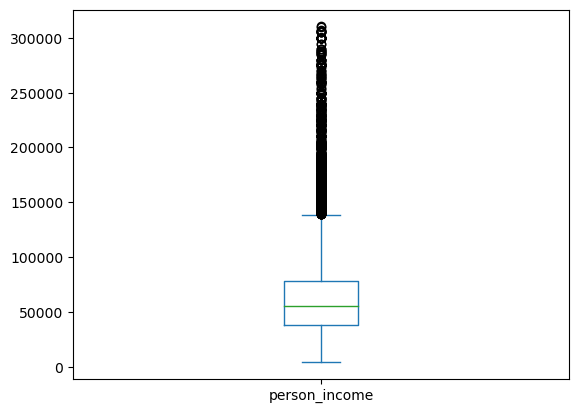

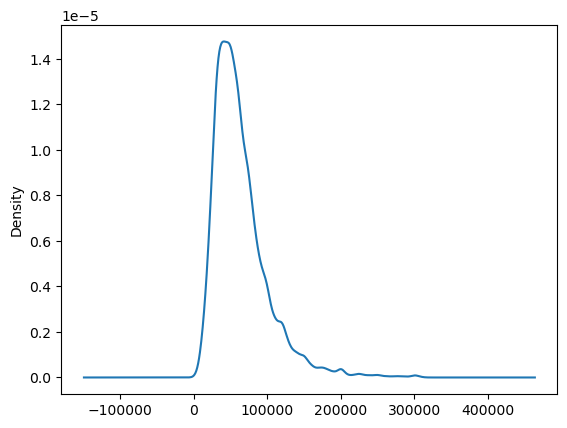

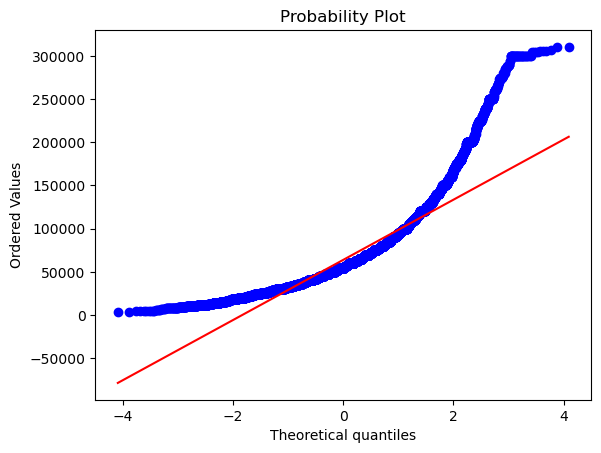

In [25]:
#analysis after removing outliers
uni_viz('person_income')

Minimum of Column person_income  : 4000
Maximum of Column person_income  : 310400
Mean of Column person_income  : 63911.2086902737
Median of Column person_income  : 55000.0
Std of Column person_income  : 37654.82701674297


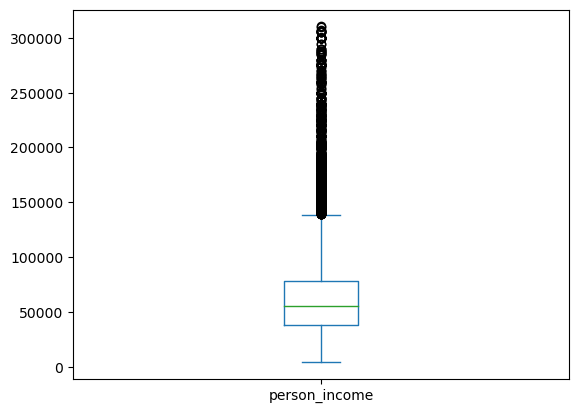

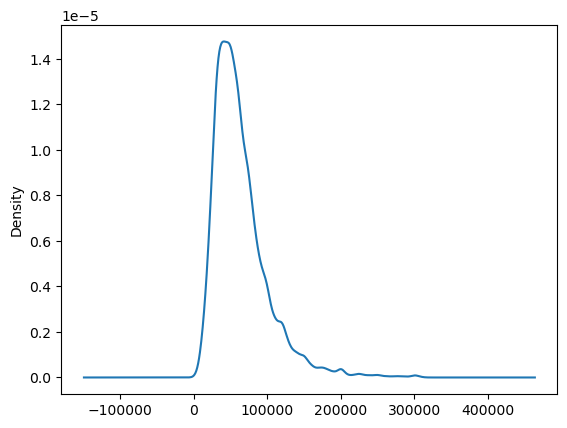

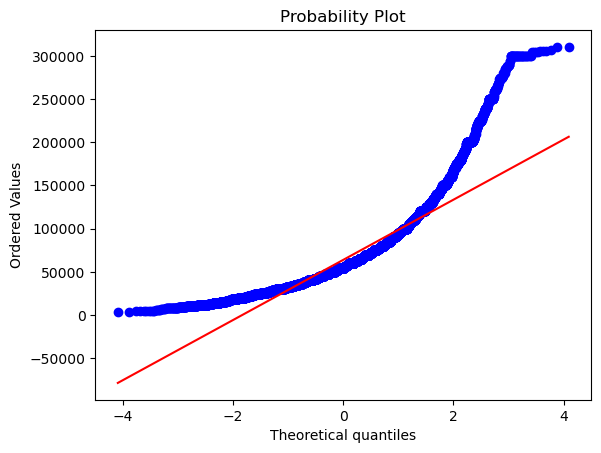

(32335, 12)

In [26]:
uni_viz('person_income')
df.shape

Mode of the column person_home_ownership: 0    RENT
Name: person_home_ownership, dtype: object


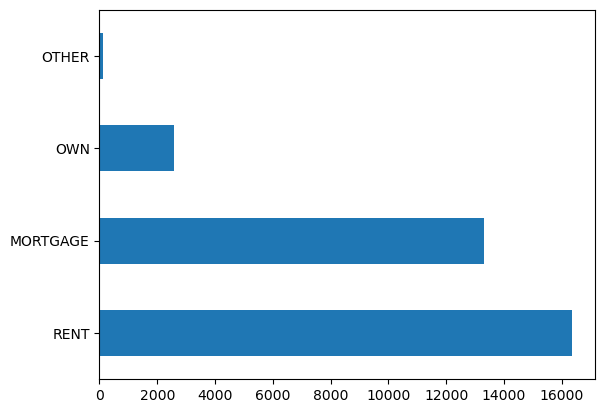

In [27]:
 # Univariate Analysis on column -> person_home_ownership
uni_viz('person_home_ownership')

Minimum of Column person_emp_length  : 0.0
Maximum of Column person_emp_length  : 123.0
Mean of Column person_emp_length  : 4.755837327972785
Median of Column person_emp_length  : 4.0
Std of Column person_emp_length  : 4.060565994168367


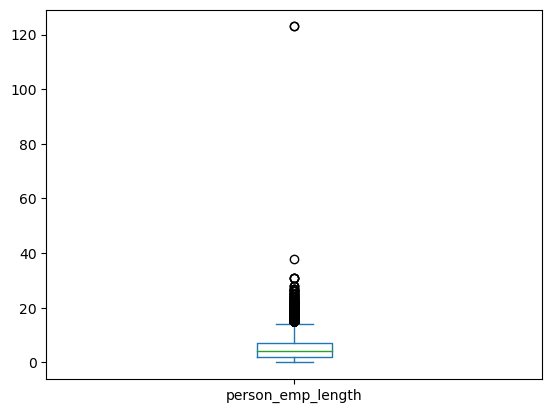

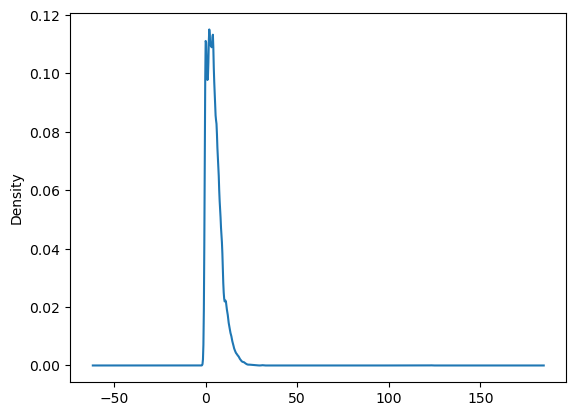

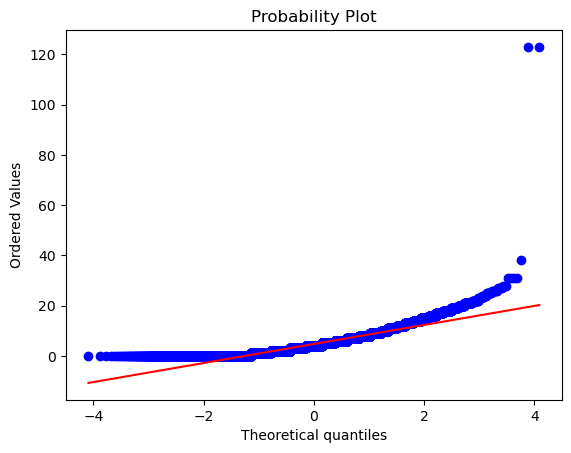

In [28]:
 # Univariate Analysis on column -> person_emp_length
uni_viz('person_emp_length')

Minimum of Column person_emp_length  : 0.0
Maximum of Column person_emp_length  : 38.0
Mean of Column person_emp_length  : 4.748523180651347
Median of Column person_emp_length  : 4.0
Std of Column person_emp_length  : 3.952756082809705


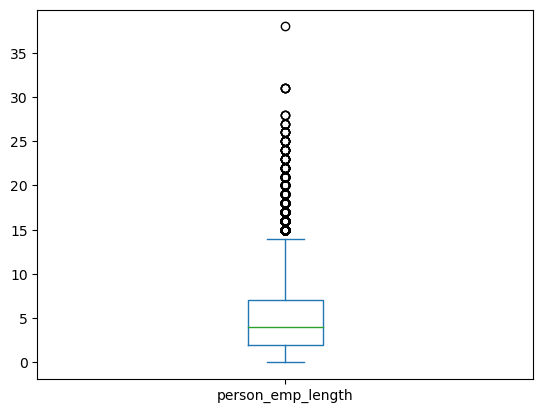

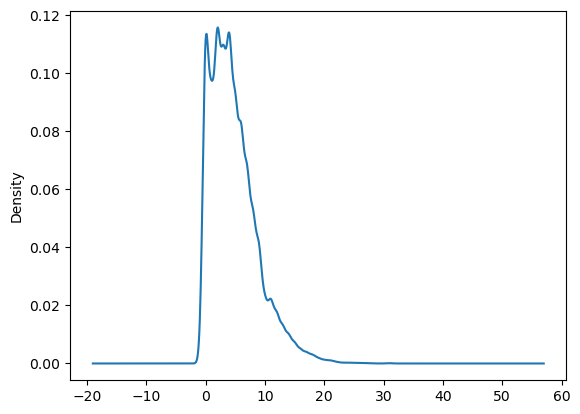

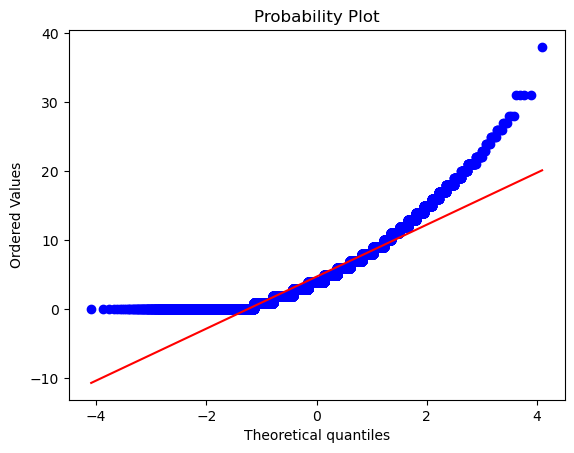

In [29]:
df = df[(df['person_emp_length'] < 45)]
uni_viz('person_emp_length')

Mode of the column loan_intent: 0    EDUCATION
Name: loan_intent, dtype: object


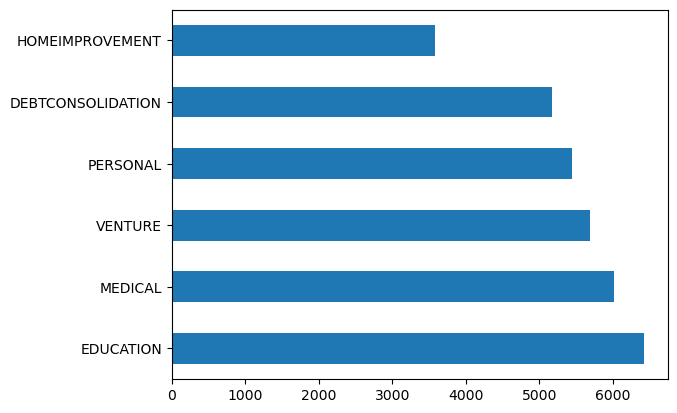

In [30]:
 # Univariate Analysis on column -> loan_intent
uni_viz('loan_intent')

Mode of the column loan_grade: 0    A
Name: loan_grade, dtype: object


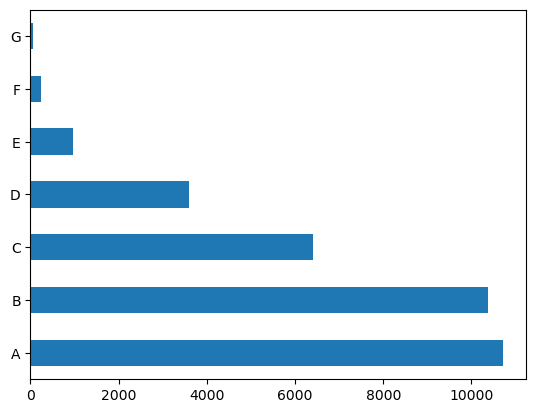

In [31]:
 # Univariate Analysis on column -> loan_grade
uni_viz('loan_grade')

Minimum of Column loan_amnt  : 500
Maximum of Column loan_amnt  : 35000
Mean of Column loan_amnt  : 9558.526892029815
Median of Column loan_amnt  : 8000.0
Std of Column loan_amnt  : 6281.377814198589


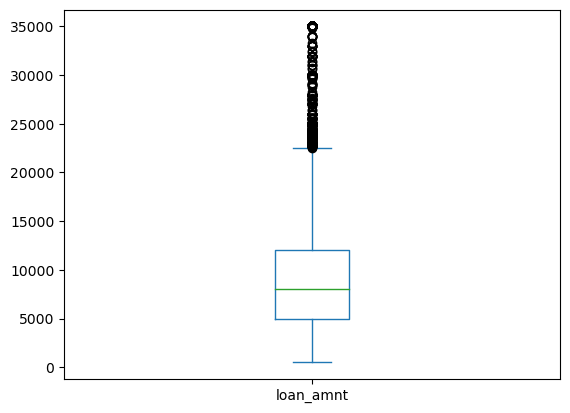

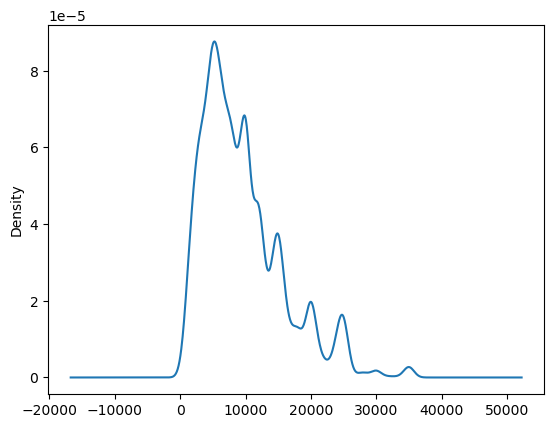

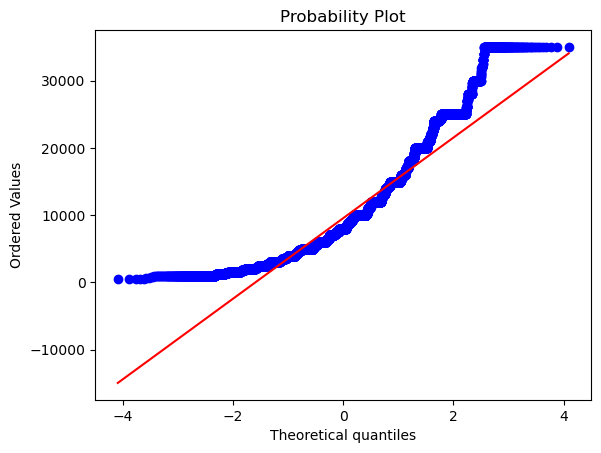

In [32]:
 # Univariate Analysis on column -> loan_amnt
uni_viz('loan_amnt')

In [33]:
LoAm_q1 = df['loan_amnt'].quantile(0.10)
LoAm_q3 = df['loan_amnt'].quantile(0.90)

LoAm_IQR = LoAm_q3 - LoAm_q1

LoAm_lower_bound = LoAm_q1 - 1.5 * LoAm_IQR
LoAm_upper_bound = LoAm_q3 + 1.5 * LoAm_IQR

print(LoAm_lower_bound)
print(LoAm_upper_bound)
print(df.shape)

-21000.0
43000.0
(32333, 12)


In [34]:
df = df[(df['loan_amnt'] > LoAm_lower_bound) & (df['loan_amnt'] < LoAm_upper_bound)]
print(df.shape)

(32333, 12)


Minimum of Column loan_amnt  : 500
Maximum of Column loan_amnt  : 35000
Mean of Column loan_amnt  : 9558.526892029815
Median of Column loan_amnt  : 8000.0
Std of Column loan_amnt  : 6281.377814198589


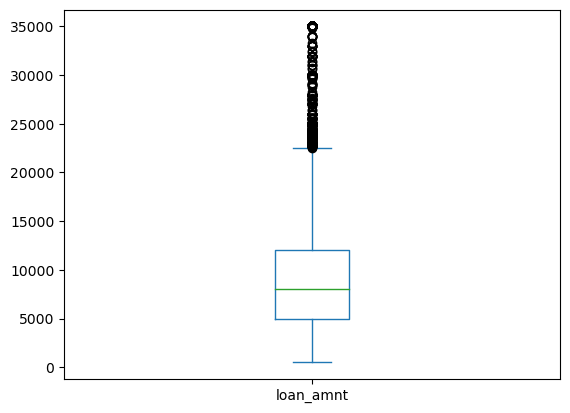

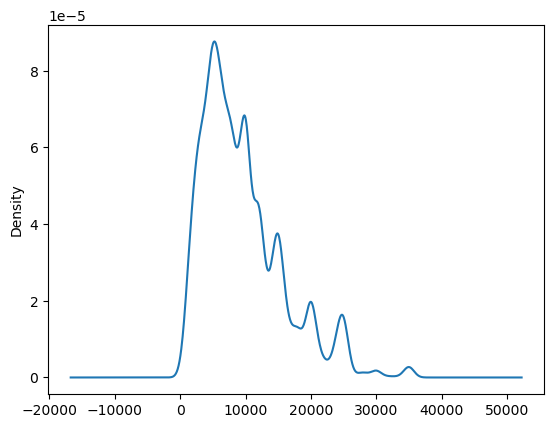

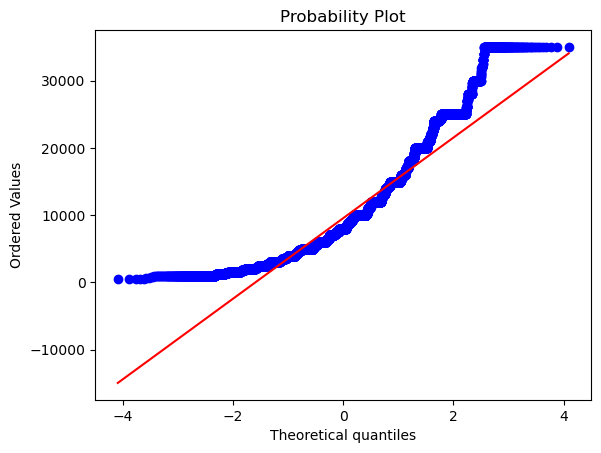

In [35]:
uni_viz('loan_amnt')

Minimum of Column loan_int_rate  : 5.42
Maximum of Column loan_int_rate  : 23.22
Mean of Column loan_int_rate  : 11.008056165526842
Median of Column loan_int_rate  : 11.0
Std of Column loan_int_rate  : 3.081958431888248


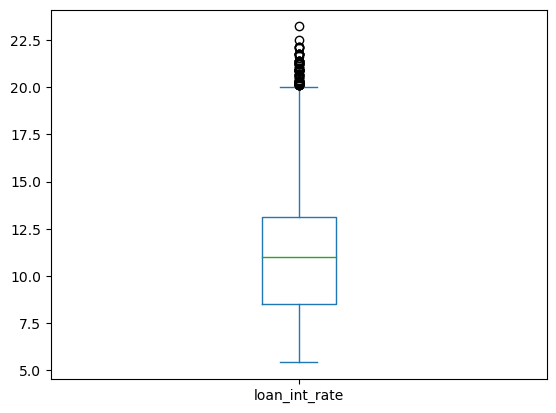

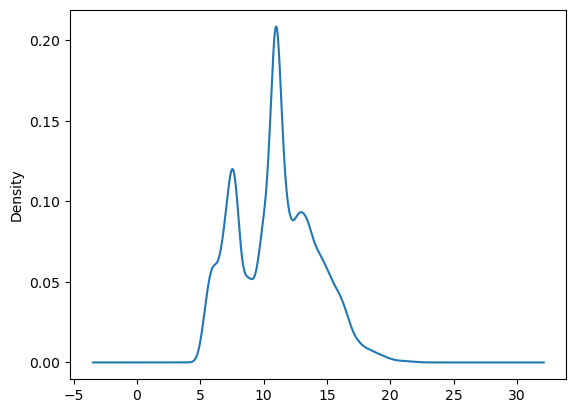

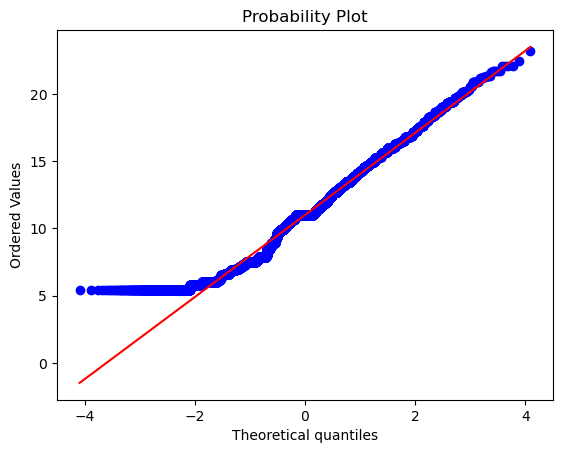

In [36]:
 # Univariate Analysis on column -> loan_int_rate
uni_viz('loan_int_rate')

In [37]:
print(df.shape)
LIR_q1 = df['loan_int_rate'].quantile(0.10)
LIR_q3 = df['loan_int_rate'].quantile(0.90)

LIR_IQR = LIR_q3 - LIR_q1

LIR_lower_bound = LIR_q1 - 1.5 * LIR_IQR
LIR_upper_bound = LIR_q3 + 1.5 * LIR_IQR

print(LIR_lower_bound)
print(LIR_upper_bound)
print(df.shape)

(32333, 12)
-5.515000000000002
27.645000000000003
(32333, 12)


Minimum of Column loan_int_rate  : 5.42
Maximum of Column loan_int_rate  : 23.22
Mean of Column loan_int_rate  : 11.008056165526842
Median of Column loan_int_rate  : 11.0
Std of Column loan_int_rate  : 3.081958431888248


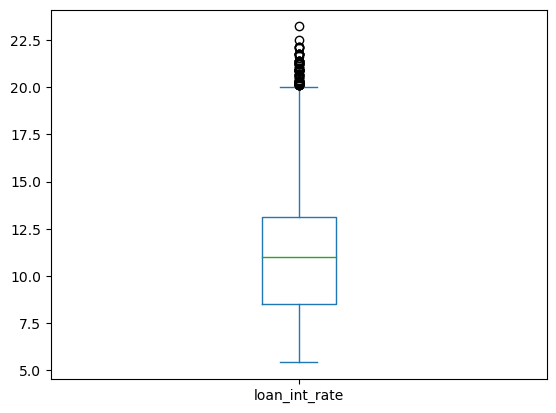

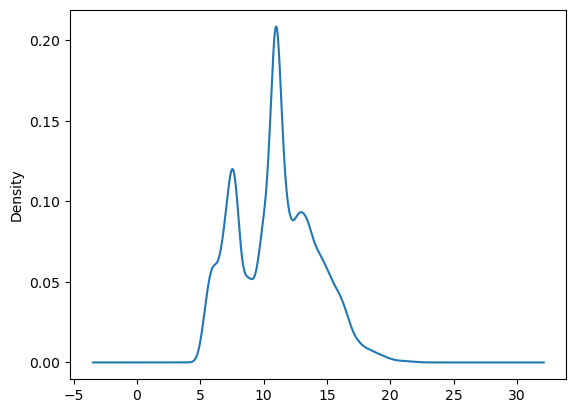

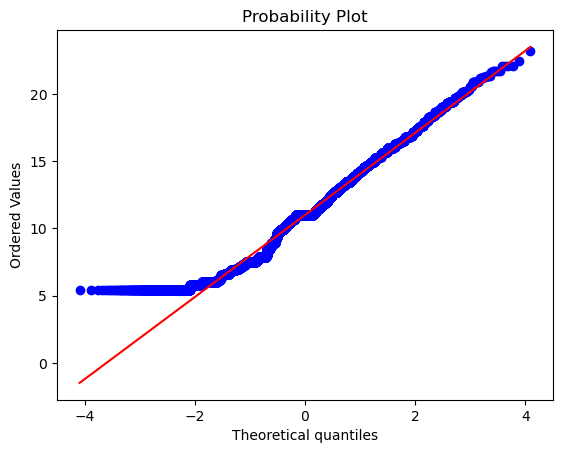

In [38]:
uni_viz('loan_int_rate')

Mode of the column loan_status: 0    NO
Name: loan_status, dtype: object


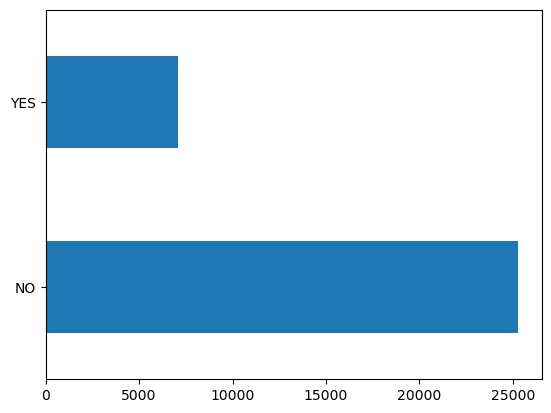

In [39]:
 # Univariate Analysis on column -> loan_status
uni_viz('loan_status')

Minimum of Column loan_percent_income  : 0.01
Maximum of Column loan_percent_income  : 0.83
Mean of Column loan_percent_income  : 0.17072279095661272
Median of Column loan_percent_income  : 0.15
Std of Column loan_percent_income  : 0.10660165183024026


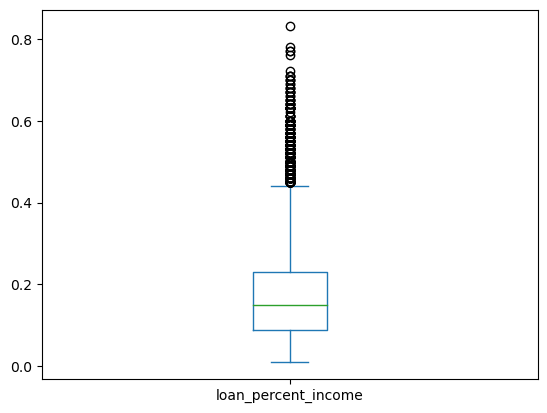

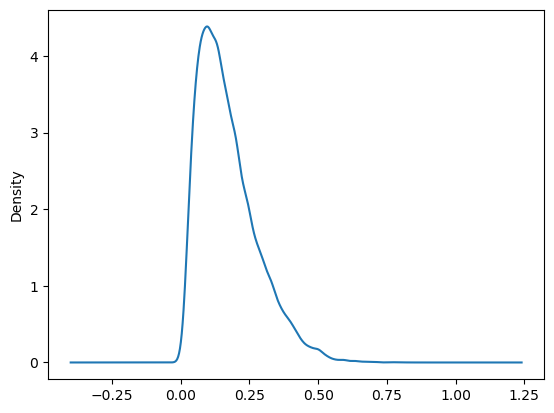

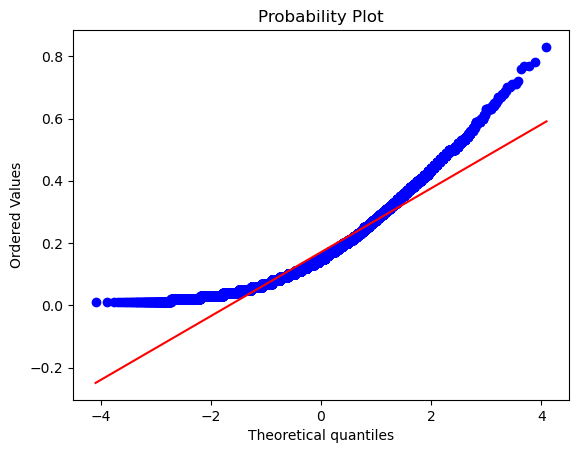

In [40]:
 # Univariate Analysis on column -> loan_percent_income
uni_viz('loan_percent_income')

Mode of the column cb_person_default_on_file: 0    N
Name: cb_person_default_on_file, dtype: object


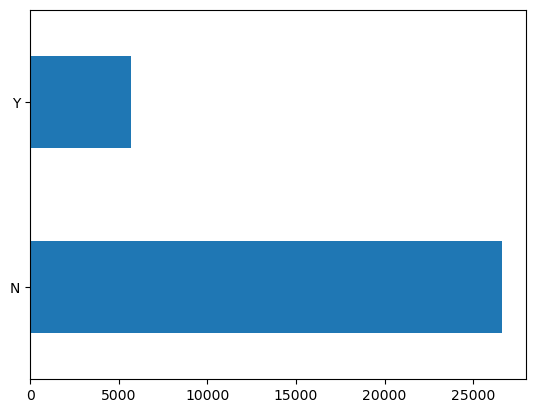

In [41]:
 # Univariate Analysis on column -> cb_person_default_on_file
uni_viz('cb_person_default_on_file')

Minimum of Column cb_person_cred_hist_length  : 2
Maximum of Column cb_person_cred_hist_length  : 30
Mean of Column cb_person_cred_hist_length  : 5.720069279064733
Median of Column cb_person_cred_hist_length  : 4.0
Std of Column cb_person_cred_hist_length  : 3.888283373021426


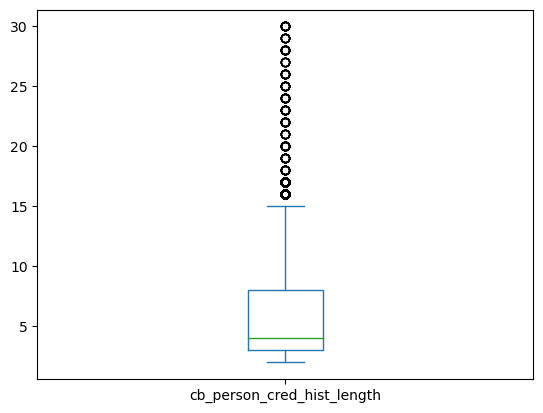

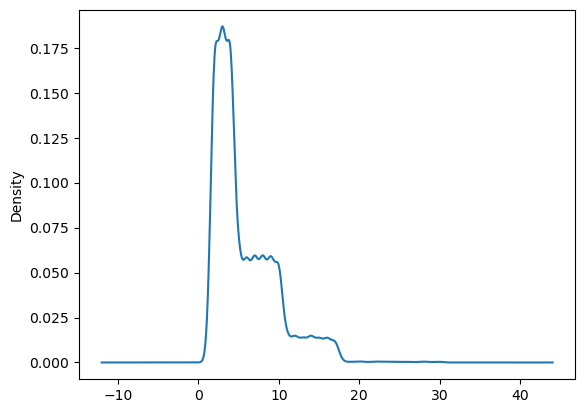

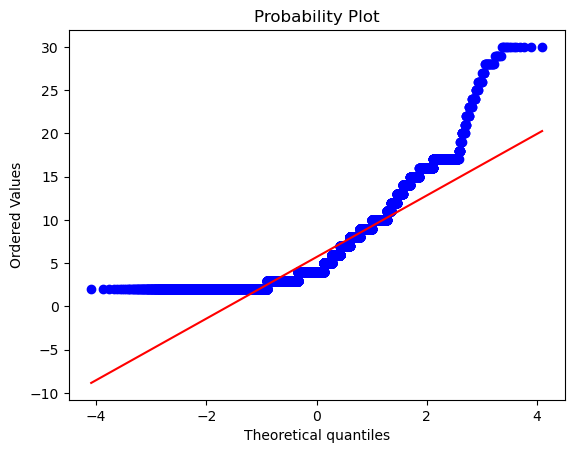

In [42]:
 # Univariate Analysis on column -> cb_person_cred_hist_length
uni_viz('cb_person_cred_hist_length')

In [43]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

# Bi-Variate Analysis on Various Columns w.r.t  *'loan_status'*

In [44]:
def bi_viz(column):
    if df[column].dtype == object:
        pd.crosstab(df[column], df["loan_status"]).plot(kind="barh", stacked=True)
        plt.show()
    else:
        sns.boxplot(df[column], df["loan_status"])
        plt.show()

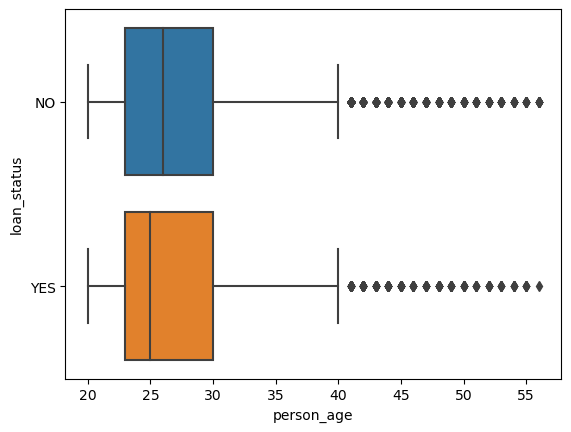

In [45]:
# Bi-variate Analysis on person_age w.r.t 'loan_status'

bi_viz('person_age')

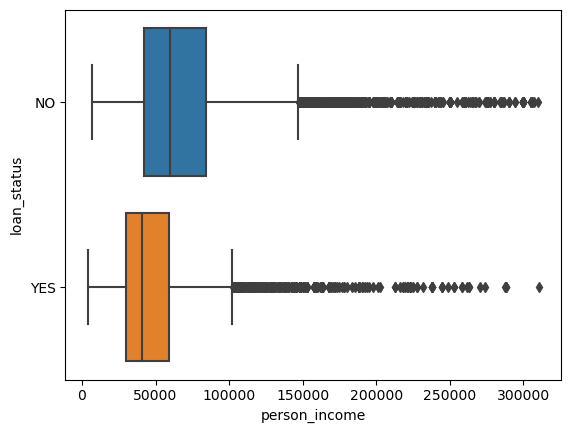

In [46]:
# Bi-variate Analysis on person_income w.r.t 'loan_status'

bi_viz('person_income')

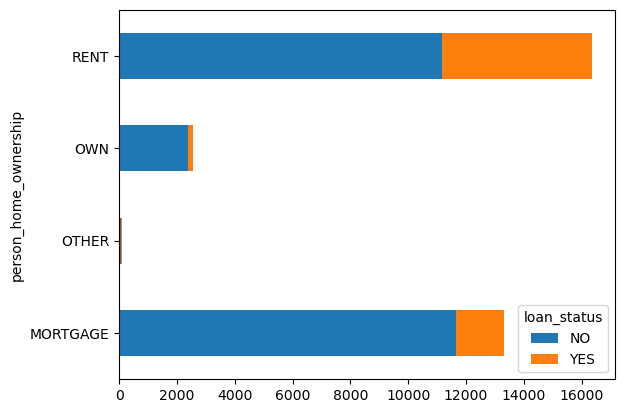

In [47]:
# Bi-variate Analysis on person_home_ownership w.r.t 'loan_status'

bi_viz('person_home_ownership')

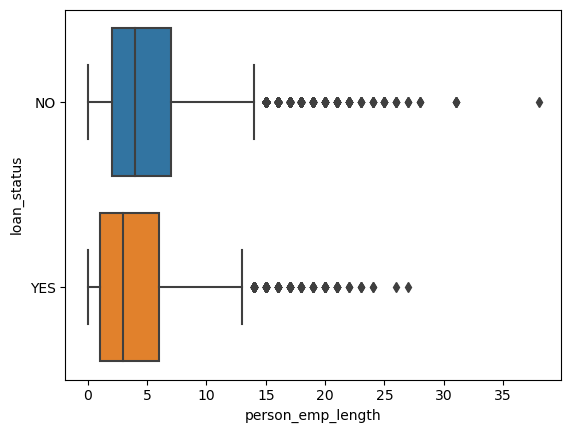

In [48]:
# Bi-variate Analysis on person_emp_length w.r.t 'loan_status'

bi_viz('person_emp_length')

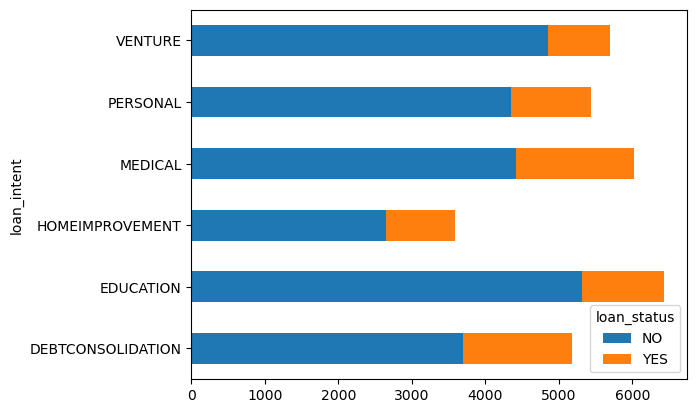

In [49]:
# Bi-variate Analysis on loan_intent w.r.t 'loan_status'

bi_viz('loan_intent')

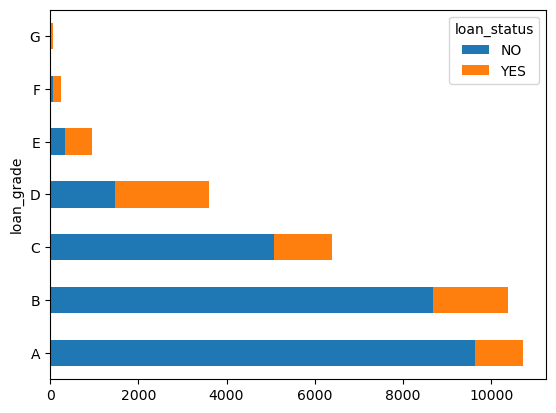

In [50]:
# Bi-variate Analysis on loan_grade w.r.t 'loan_status'

bi_viz('loan_grade')

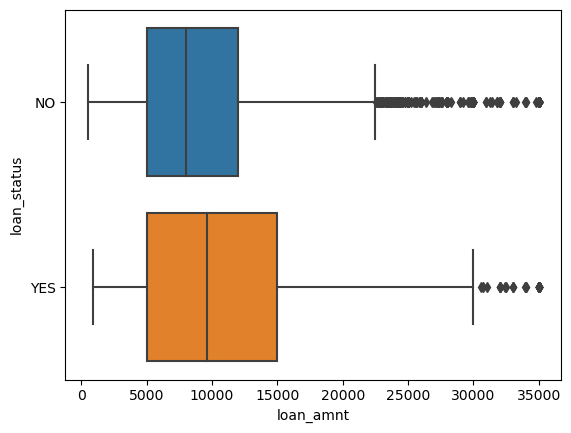

In [51]:
# Bi-variate Analysis on loan_amnt w.r.t 'loan_status'

bi_viz('loan_amnt')

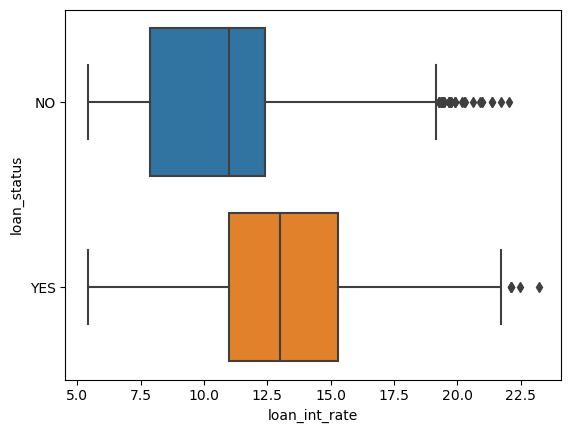

In [52]:
# Bi-variate Analysis on loan_int_rate w.r.t 'loan_status'

bi_viz('loan_int_rate')

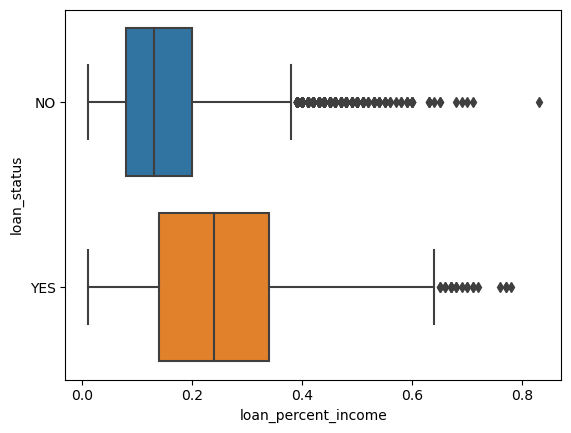

In [53]:
# Bi-variate Analysis on loan_percent_income w.r.t 'loan_status'

bi_viz('loan_percent_income')

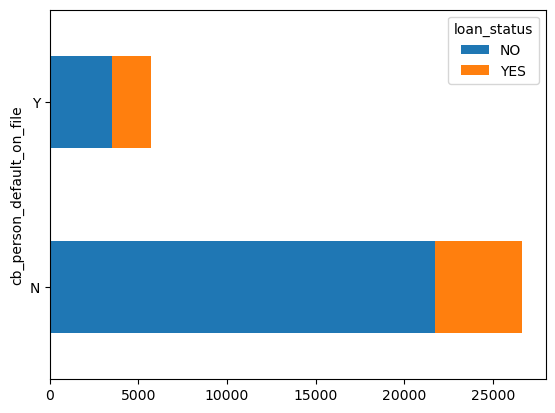

In [54]:
# Bi-variate Analysis on cb_person_default_on_file w.r.t 'loan_status'

bi_viz('cb_person_default_on_file')

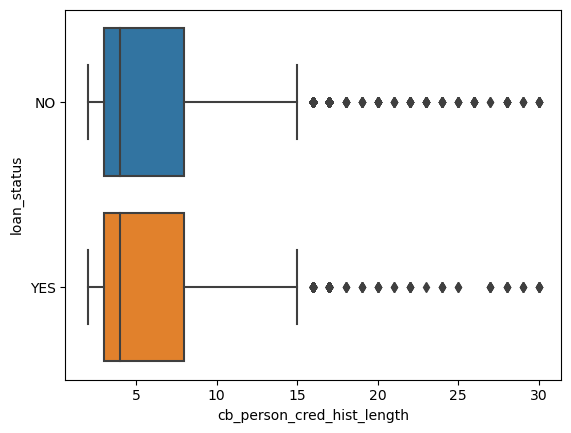

In [55]:
# Bi-variate Analysis on cb_person_cred_hist_length w.r.t 'loan_status'

bi_viz('cb_person_cred_hist_length')